In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [77]:
df = pd.read_csv("./UH_2023/UH_2023_TRAIN.txt", sep = "|")

In [86]:
df.tail(10)

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION,ALTITUD_MIN,ALTITUD_DIF
9591,22,84174,473,10,450-480,15,2,0,1,2.7400,NaN,450.0,30.0
9592,22,84174,473,10,450-480,32,2,0,1,2.6280,NaN,450.0,30.0
9593,22,84174,473,10,450-480,40,2,0,1,3.0600,NaN,450.0,30.0
9594,22,61478,831,10,455-465,32,2,0,1,2.4900,NaN,455.0,10.0
9595,22,34244,831,10,455-465,32,2,0,1,5.1900,NaN,455.0,10.0
9596,22,37461,239,6,700,52,2,0,1,3.6800,NaN,700.0,0.0
9597,22,58769,239,6,700,32,2,0,1,4.2500,NaN,700.0,0.0
9598,22,58769,239,6,700,59,2,0,1,4.0700,NaN,700.0,0.0
9599,22,88928,239,6,700,40,2,0,1,4.5727,NaN,700.0,0.0
9600,22,88928,239,6,700,52,2,0,1,1.6099,NaN,700.0,0.0


In [4]:
df = df.astype({"CAMPAÑA": str, "ID_FINCA": str, "ID_ZONA": str, "ID_ESTACION": str, "VARIEDAD": str, "MODO": str, "TIPO": str, "COLOR": str})

In [84]:
def fun(x, mode): 
    altitud = str(x).split('-')
    if altitud[0] == "nan":
        return np.nan
    if mode == "min":
        return int(altitud[0])
    if mode == "diff":
        if len(altitud) == 1:
            return 0
        else:
            return int(altitud[1])-int(altitud[0])

df["ALTITUD_MIN"] = df["ALTITUD"].apply(fun, args=("min",))
df["ALTITUD_DIF"] = df["ALTITUD"].apply(fun, args=("diff",))

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CAMPAÑA      9601 non-null   object 
 1   ID_FINCA     9601 non-null   object 
 2   ID_ZONA      9601 non-null   object 
 3   ID_ESTACION  9601 non-null   object 
 4   ALTITUD      9547 non-null   object 
 5   VARIEDAD     9601 non-null   object 
 6   MODO         9601 non-null   object 
 7   TIPO         9601 non-null   object 
 8   COLOR        9601 non-null   object 
 9   SUPERFICIE   9601 non-null   float64
 10  PRODUCCION   8526 non-null   float64
dtypes: float64(2), object(9)
memory usage: 825.2+ KB


In [6]:
df.dtypes

CAMPAÑA         object
ID_FINCA        object
ID_ZONA         object
ID_ESTACION     object
ALTITUD         object
VARIEDAD        object
MODO            object
TIPO            object
COLOR           object
SUPERFICIE     float64
PRODUCCION     float64
dtype: object

In [23]:
# categorías que identifican unívocamente a una muestra
df.loc[:,["CAMPAÑA", "ID_FINCA", "ID_ZONA", "VARIEDAD", "MODO", "TIPO"]].value_counts()

CAMPAÑA  ID_FINCA  ID_ZONA  VARIEDAD  MODO  TIPO
14       10091     803      87        1     0       1
19       93538     373      59        1     0       1
         93922     50       87        2     0       1
         93970     751      59        2     0       1
         94033     44       52        2     0       1
                                                   ..
16       87434     417      15        2     0       1
         87539     449      59        2     0       1
         87552     468      52        2     0       1
         87611     602      81        1     0       1
22       99793     919      87        2     0       1
Length: 9601, dtype: int64

In [110]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df2)

In [ ]:
profile

In [91]:
df.loc[-48:,["CAMPAÑA"]]

,CAMPAÑA
0,14
1,14
2,14
3,14
4,14
...,...
9596,22
9597,22
9598,22
9599,22


#### CAMPAÑA

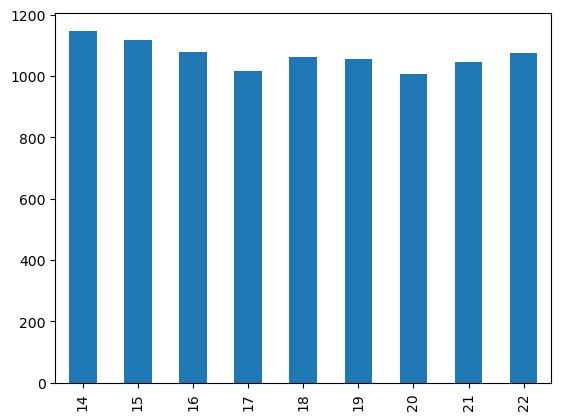

In [30]:
df['CAMPAÑA'].value_counts().reindex([str(i) for i in range(14, 23)]).plot(kind='bar')
# Cada año el número de fincas y/o zonas va disminuyendo
df["CAMPAÑA"] = df["CAMPAÑA"].astype(str)

#### ID_FINCA

In [24]:
a = pd.DataFrame(df.loc[:,["CAMPAÑA", "ID_FINCA"]].value_counts())

In [25]:
tb = pd.pivot_table(a, index="ID_FINCA", columns="CAMPAÑA", values=0)
d = {}
for t in tb.columns:
    d[t] = tb[t].value_counts().to_dict()

In [26]:
d = pd.DataFrame(d)
d.fillna(0)

,14,15,16,17,18,19,20,21,22
1.0,755.0,721.0,701.0,656.0,655,633.0,628.0,646.0,670.0
2.0,113.0,105.0,106.0,107.0,105,127.0,102.0,105.0,98.0
3.0,26.0,44.0,36.0,33.0,37,33.0,32.0,30.0,33.0
4.0,12.0,5.0,7.0,4.0,11,12.0,13.0,14.0,14.0
6.0,4.0,1.0,1.0,1.0,1,1.0,1.0,2.0,2.0
7.0,1.0,2.0,2.0,3.0,1,0.0,0.0,0.0,1.0
10.0,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0
5.0,0.0,1.0,0.0,1.0,2,3.0,4.0,6.0,7.0
8.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0


#### ID_ZONA

In [105]:
a = pd.DataFrame(df.loc[:,["CAMPAÑA", "ID_ZONA"]].value_counts())

In [106]:
tb = pd.pivot_table(a, index="ID_ZONA", columns="CAMPAÑA", values=0)
d = {}
for t in tb.columns:
    d[t] = tb[t].value_counts().to_dict()

In [109]:
d = pd.DataFrame(d)
d.fillna(0)

,14,15,16,17,18,19,20,21,22
1.0,19.0,17.0,14.0,11.0,14.0,16.0,19.0,12.0,9.0
2.0,11.0,13.0,12.0,14.0,11.0,6.0,9.0,14.0,13.0
4.0,8.0,6.0,6.0,6.0,8.0,7.0,5.0,2.0,4.0
5.0,8.0,6.0,3.0,9.0,8.0,5.0,10.0,9.0,6.0
12.0,6.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### ID ESTACION

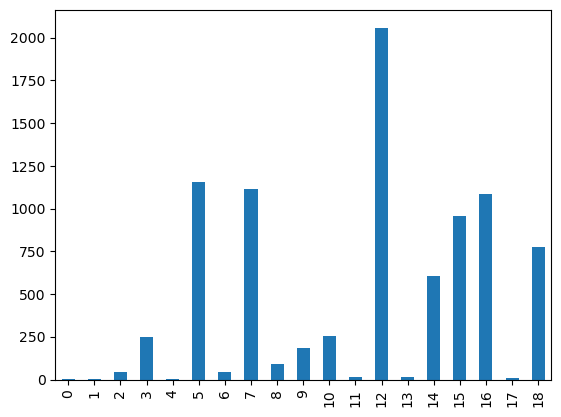

In [45]:
df['ID_ESTACION'].value_counts().reindex([str(i) for i in range(0, 19)]).plot(kind='bar')
# Cada año el número de fincas y/o zonas va disminuyendo
df["ID_ESTACION"] = df["ID_ESTACION"].astype(str)

#### ALTITUD

<AxesSubplot: >

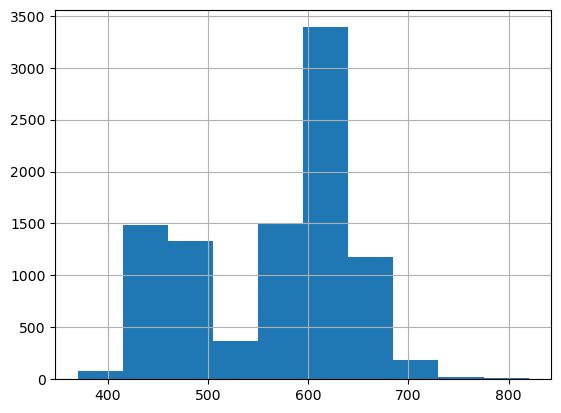

In [87]:
df["ALTITUD_MIN"].hist()

<AxesSubplot: >

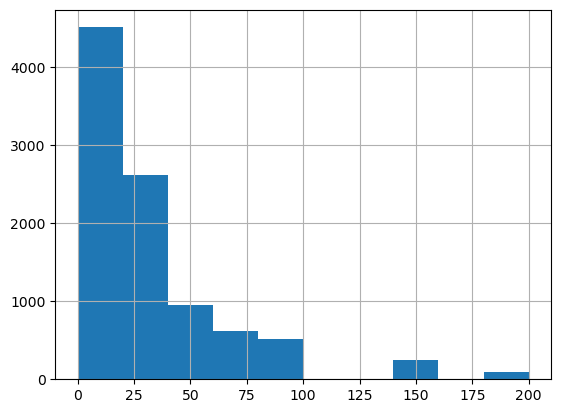

In [88]:
df["ALTITUD_DIF"].hist()

#### VARIEDAD

<AxesSubplot: >

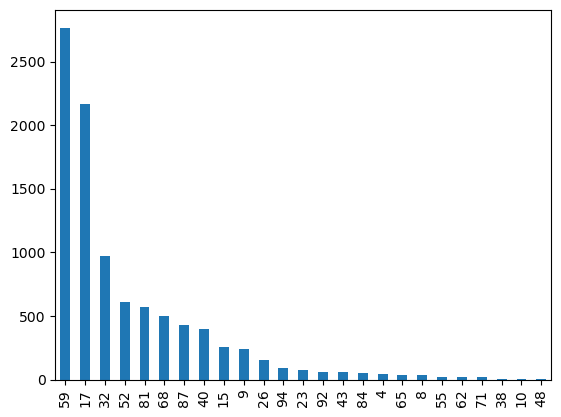

In [51]:
df["VARIEDAD"].value_counts().plot(kind='bar')

#### MODO

<AxesSubplot: >

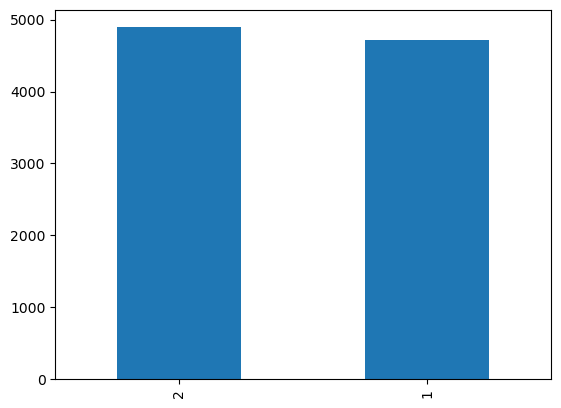

In [52]:
df["MODO"].value_counts().plot(kind='bar')

#### TIPO

<AxesSubplot: >

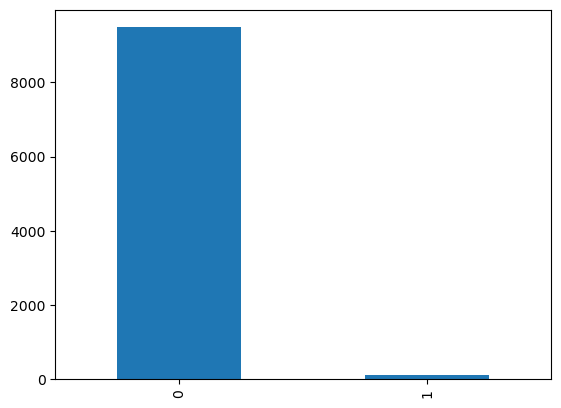

In [53]:
df["TIPO"].value_counts().plot(kind='bar')

#### COLOR

<AxesSubplot: >

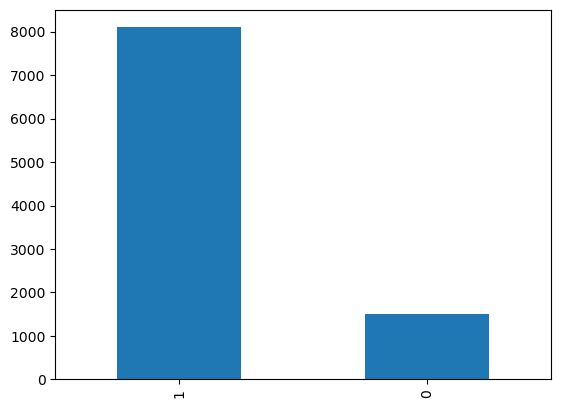

In [54]:
df["COLOR"].value_counts().plot(kind='bar')

#### SUPERFICIE

<AxesSubplot: >

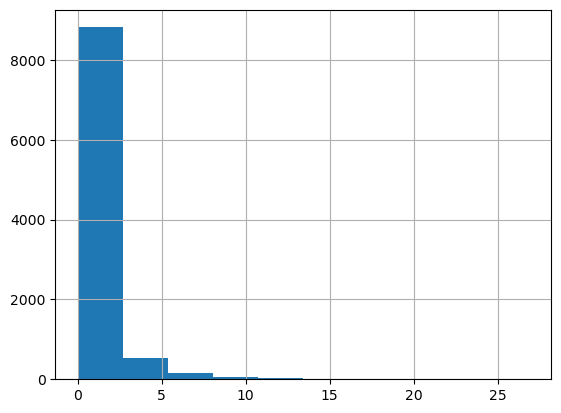

In [55]:
df["SUPERFICIE"].hist()

#### PRODUCCION

<AxesSubplot: >

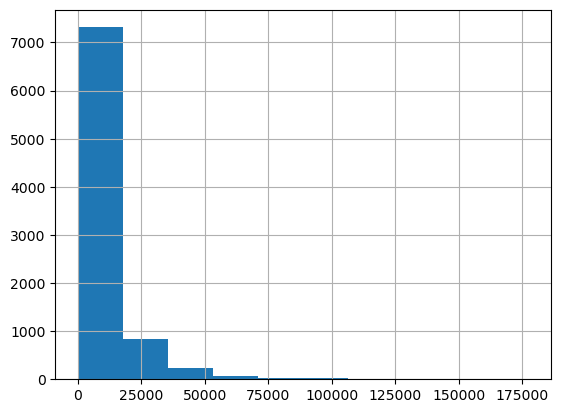

In [56]:
df["PRODUCCION"].hist()